
ENCODING OF DNA SEQUENCES INTO COMPLEX NUMBERS AND CLASSIFICATION WITH COMPLEX-VALUED ARTIFICIAL NEURAL NETWORKS:

Step 1 (Data import): Raw DNA sequences of Kinase and GPCR proteins are imported separately in fasta form using accession numbers from NCBI gene bank. Kinase and GPCR DNA sequences are imported separately in two stages.

Step 2 (Data preprocessing): DNA sequences of Kinase and GPCR proteins are labelled as "1" and "0", limited to 900, randomly mixed and combined and saved as a single dataframe in fasta form.

Step 3 (Complex Coding) : The combined dataframe in categorical form is converted into complex numbers by the proposed Complex Coding Method and saved as a complex-valued dataframe.

Step 4 (Classification): Using complex-valued dataframe, Kinase and GPCR proteins are classified by Complex deep learning method.

Step 5 (Results and Graphs): Classification results measured by different metrics are visualised with Graphs.



STEP 1:DATA IMPORT

a) DNA sequences of Kinase proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
#For the kinase protein family, it imports 100 nucleotide sequence samples corresponding to proteins (CDS) from NCBI and saves them in a file:

#Importing 100 nucleotide sequences (CDS) for kinase:

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"  #  email goes here

# Define protein accession numbers
accessions = ["CAA77753.1",
"CAA77752.1",
"CAA42411.1",
"CAA33389.1",
"CAA42556.1",
"CAA42713.1",
"CAA44396.1",
"CAA42744.1",
"CAA38700.1",
"CAA40491.1",
"CAA43372.1",
"CAA46388.1",
"NP_001015048.1",
"CAA78813.1",
"CAA39849.1",
"CAA47001.1",
"CAA47002.1",
"CAA47004.1",
"CAA47006.1",
"CAA47008.1",
"AAH93072.1",
"AAA51548.1",
"AAA35503.1",
"AAA58363.1",
"AAA58364.1",
"AAA58391.1",
"AAB50921.1",
"AAB50922.1",
"AAA58424.1",
"NP_060260.3",
"AAH93822.1",
"AAA76851.1",
"AAA52025.1",
"AAA96609.1",
"AAA98744.1",
"AAH92416.1",
"AAC14449.1",
"AAC14450.1",
"AAC14451.1",
"AAA58459.1",
"NP_008959.3",
"NP_001015878.1",
"BAD96360.1",
"AAA59502.1",
"AAA59555.1",
"AAB59362.1",
"AAA36318.1",
"AAA36406.1",
"AAB59449.1",
"AAA36409.1",
"AAA36410.1",
"AAA36411.1",
"AAA03176.1",
"AAA18253.1",
"AAA36442.1",
"AAA60095.1",
"BAD96365.1",
"AAA60099.1",
"AAA60170.1",
"AAA03175.1",
"AAC41690.1",
"AAA60102.1",
"AAA60100.1",
"AAA60104.1",
"AAA36449.1",
"AAA36539.1",
"BAA01547.1",
"AAC82497.1",
"BAD96423.1",
"AAB26341.1",
"AAA35639.1",
"AAA58620.1",
"AAA52643.1",
"AAA52644.1",
"AAA36206.1",
"AAA59540.1",
"AAA36488.1",
"AAA36748.1",
"CAA48870.1",
"CAA41728.1",
"CAA51837.1",
"BAD96489.1",
"AAA36585.1",
"AAA36614.1",
"AAA36615.1",
"AAA52576.1",
"AAA36657.1",
"AAA60078.1",
"AAA60175.1",
"AAA18284.1",
"AAA36659.1",
"AAA18251.1",
"BAD96647.1",
"AAA03565.1",
"AAA60171.1",
"AAC50062.1",
"AAA35673.1",
"AAA16703.1",
"CAA53536.1",
"AAA18225.1"]  # Replace with your protein accession number

# Fetch nucleotide sequences coding for the proteins and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta_cds_na", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(".")[0]  # Remove version number
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\KİNASE_DNA_Fasta.xlsx", index=False)


Below are the first five lines of the KİNAZ DNA sequences downloaded to the file, printed with .head():

In [2]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_DNA_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  lcl|Z11695  ATGGTCCGCGGGCAGGTGTTCGACGTGGGGCCGCGCTACACCAACC...
1  lcl|Z11694  ATGGCGGCGGCGGCGGCGGCGGGCGCGGGCCCGGAGATGGTCCGCG...
2  lcl|X59727  ATGGCTGAGAAGGGTGACTGCATCGCCAGTGTCTATGGGTATGACC...
3  lcl|X15334  ATGCCCTTCTCCAACAGCCACAACGCACTGAAGCTGCGCTTCCCGG...
4  lcl|X59932  ATGTCAGCAATACAGGCCGCCTGGCCATCCGGTACAGAATGTATTG...




b) DNA sequences of GPCR proteins with accession numbers from NCBI are imported and saved as 'fasta'.

In [ ]:
#For the kinase protein family, imports the 100 nucleotide sequence (CDS) from NCBI and saves it to a file:

# Importing GPCR nucleotide sequence (CDS)

from Bio import Entrez, SeqIO
import pandas as pd

# Set email address for Entrez requests
Entrez.email = "https://www.ncbi.nlm.nih.gov/protein"  # Your email goes here

# Define protein accession numbers
accessions = ["CAA77746.1",
"CAA40530.1",
"CAA38699.1",
"CAA39286.1",
"CAA45319.1",
"CAA33336.1",
"CAA33337.1",
"CAA77558.1",
"CAA40963.1",
"AAA35491.1",
"AAA58353.1",
"AAA58355.1",
"AAA51570.1",
"AAA51598.1",
"AAA35535.1",
"AAA62831.1",
"AAA58408.1",
"AAB05207.1",
"AAA88024.1",
"AAA52342.1",
"AAA35847.1",
"AAA52478.1",
"AAA88050.1",
"AAA58647.1",
"AAA58675.1",
"AAA36108.1",
"AAA59933.1",
"AAA36366.1",
"AAA16594.1",
"AAA60001.1",
"AAA60070.1",
"BAA01920.1",
"BAA14398.1",
"BAA01720.1",
"BAA01050.1",
"BAA01722.1",
"BAA02445.1",
"CAA43953.1",
"CAA39284.1",
"AAA35604.1",
"AAA35924.1",
"AAA16617.1",
"CAA50641.1",
"CAA68560.1",
"AAB25531.1",
"AAB26273.1",
"AAA36605.1",
"AAA58247.1",
"AAA60315.1",
"AAA60316.1",
"AAA36641.1",
"AAA36646.1",
"AAA60601.1",
"AAA03651.1",
"CAA52376.1",
"AAC37538.1",
"AAA03209.1",
"AAC52063.1",
"CAA50979.1",
"AAC13372.1",
"AAC13373.1",
"CAA54182.1",
"AAA36434.1",
"AAA60002.1",
"AAA17684.1",
"BAA05840.1",
"AAA73958.1",
"AAA74230.1",
"CAA54031.1",
"AAA19119.1",
"AAB60351.1",
"CAA84380.1",
"AAA98990.1",
"CAA46621.1",
"AAB60656.1",
"AAC09005.1",
"BAA03319.1",
"AAB29854.1",
"AAB31320.1",
"AAB59437.1",
"AAC14460.1",
"AAA64592.1",
"AAA64593.1",
"BAA04120.1",
"AAC50158.1",
"AAA63180.1",
"AAA62837.1",
"AAA63181.1",
"AAA61794.1",
"CAA58749.1",
"CAA58739.1",
"CAA58740.1",
"AAB59486.1",
"AAA62158.1",
"AAB59487.1",
"AAA98457.1",
"AAA62271.1",
"AAA63906.1",
"BAA08618.1",
"CAA57019.1"]  # Replace with your protein accession number

# Fetch nucleotide sequences coding for the proteins and store them in a list
records = []
for accession in accessions:
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta_cds_na", retmode="text")
    record = SeqIO.read(handle, "fasta")
    records.append(record)
    handle.close()

# Create pandas dataframe with the accession numbers and sequences
data = []
for record in records:
    accession = record.id.split(".")[0]  # Remove version number
    sequence = str(record.seq)
    data.append({"Accession": accession, "Sequence": sequence})
df = pd.DataFrame(data)

# Save dataframe to excel file
df.to_excel("D:\datasetTEZ\GPCR_DNA_Fasta.xlsx", index=False)

Below are the first five lines of the GPCR DNA sequences downloaded to the file, printed with .head():

In [3]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\GPCR_DNA_Fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

    Accession                                           Sequence
0  lcl|Z11687  ATGCTCATGGCGTCCACCACTTCCGCTGTGCCTGGGCATCCCTCTC...
1  lcl|X57250  ATGAACTCCTTCAATTATACCACCCCTGATTATGGGCACTATGATG...
2  lcl|X54937  ATGAAGTCGATCCTAGATGGCCTTGCAGATACCACCTTCCGCACCA...
3  lcl|X55760  ATGAGGACTCTGAACACCTCTGCCATGGACGGGACTGGGCTGGTGG...
4  lcl|X63819  ATGGAAACCAACTTCTCCACTCCTCTGAATGAATATGAAGAAGTGT...



STEP 2 : DATA PREPROCESSING

DNA sequences of Kinase and GPCR proteins located in two different files are labeled "1" and "0", limited to 900, randomly mixed and combined, and saved as a single data frame in fasta form. 

In [5]:
#It labels the DNA fasta sequences of kinase and GPCR as "1" and "0", delimits them, randomly shuffles them and saves them as a single dataframe.

import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import cmath

# Step 1: Load and labelling data
kinaz_df = pd.read_excel("D:\datasetTEZ\KİNASE_DNA_Fasta.xlsx")
kinaz_df['label'] = (1)

gpcr_df = pd.read_excel("D:\datasetTEZ\GPCR_DNA_Fasta.xlsx")
gpcr_df['label'] = (0)

# Step 2: Limit protein sequences to 300 characters
kinaz_df['Sequence'] = kinaz_df['Sequence'].str[:900]
gpcr_df['Sequence'] = gpcr_df['Sequence'].str[:900]

#  Step 3: Combine data and shuffle randomly
combined_df = pd.concat([kinaz_df, gpcr_df])
shuffled_df = shuffle(combined_df)

# Step 4: Save data as dataframe in a single Excel file
shuffled_df.to_excel("D:\datasetTEZ\KİNASE_GPCR_DNA_fasta.xlsx", index=False)

###



The first five lines of the dataframe for the KINASE (1) and GPCR (0) DNA sequences are as follows:

In [6]:
#Print the first 5 rows using .head()
import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_DNA_fasta.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

# Print the first 5 rows using .head()
print(output_data.head())

      Accession                                           Sequence  label
0    lcl|L08177  ATGGATATACAAATGGCAAACAATTTTACTCCGCCCTCTGCAACTC...      0
1    lcl|L05597  ATGGATTTCTTAAATTCATCTGATCAAAACTTGACCTCAGAGGAAC...      0
2    lcl|L08835  ATGTCAGCCGAGGTGCGGCTGAGGCGGCTCCAGCAGCTGGTGTTGG...      1
3  lcl|AK222927  ATGTCGAAGCCCCATAGTGAAGCCGGGACTGCCTTCATTCAGACCC...      1
4  lcl|AH003177  ATGGACCTGGGGAAACCAATGAAAAGCGTGCTGGTGGTGGCTCTCC...      0



STEP 3: COMPLEX ENCODİNG

The data frame in Categorical (Fasta) form consisting of kinase and GPCR DNA sequences is converted to complex numbers by the proposed Complex Coding Method and saved as a complex value data frame. 

In [7]:
#Encoding DNA fasta data into complex numbers by the proposed method and saving it as a complex dataframe:

import pandas as pd
import numpy as np
import cmath
import random

 # Step 1: Get DNA nucleotide sequences from Excel file
dosya_yolu = "D:\datasetTEZ\KİNASE_GPCR_DNA_fasta.xlsx"
df = pd.read_excel(dosya_yolu)

# Step 2: Map nucleotides to complex numbers
karakter_sayi_degerleri = {'A':1j, 'T':- 1j, 'G':1, 'C':- 1}

def dna_to_complex(dna_seq):
    kompleks_dizi = [(i+1) * karakter_sayi_degerleri.get(nucleotide, 0) for i, nucleotide in enumerate(dna_seq)]
    return kompleks_dizi

df['complex'] = df['Sequence'].apply(dna_to_complex)

# Step 3: Calculate and round the real part, imaginary part, modulus and angle of the resulting complex numbers
def calculate_properties(complex_numbers):
    real_parts = [round(z.real, 5) for z in complex_numbers]
    imag_parts = [round(z.imag, 5) for z in complex_numbers]
    magnitudes = [round(abs(z), 5) for z in complex_numbers]
    angles_deg = [round(cmath.phase(z) * 180 / cmath.pi, 5) for z in complex_numbers]
    return real_parts, imag_parts, magnitudes, angles_deg

df[['Real', 'Imag', 'Mode', 'Median Angle']] = df['complex'].apply(calculate_properties).apply(pd.Series)

# Step 4: Save complex data as dataframe
output_path = "D:\datasetTEZ\KİNASE_GPCR_DNA_Complex_Encoded.xlsx"
df.to_excel(output_path, index=False)

###



The first 5 lines of the data frame formed by encoding DNA sequences into complex numbers are given below:(Accession (CDS), complex number, real, Imag, Mode, Angle)

In [8]:
# Print first 5 lines of User File path using .head()

import pandas as pd

output_file = "D:\datasetTEZ\KİNASE_GPCR_DNA_Complex_Encoded.xlsx"

# Read the output file
output_data = pd.read_excel(output_file)

print(output_data.head())

      Accession                                           Sequence  label  \
0    lcl|L08177  ATGGATATACAAATGGCAAACAATTTTACTCCGCCCTCTGCAACTC...      0   
1    lcl|L05597  ATGGATTTCTTAAATTCATCTGATCAAAACTTGACCTCAGAGGAAC...      0   
2    lcl|L08835  ATGTCAGCCGAGGTGCGGCTGAGGCGGCTCCAGCAGCTGGTGTTGG...      1   
3  lcl|AK222927  ATGTCGAAGCCCCATAGTGAAGCCGGGACTGCCTTCATTCAGACCC...      1   
4  lcl|AH003177  ATGGACCTGGGGAAACCAATGAAAAGCGTGCTGGTGGTGGCTCTCC...      0   

                                             complex  \
0  [1j, -2j, 3, 4, 5j, -6j, 7j, -8j, 9j, -10, 11j...   
1  [1j, -2j, 3, 4, 5j, -6j, -7j, -8j, -9, -10j, -...   
2  [1j, -2j, 3, -4j, -5, 6j, 7, -8, -9, 10, 11j, ...   
3  [1j, -2j, 3, -4j, -5, 6, 7j, 8j, 9, -10, -11, ...   
4  [1j, -2j, 3, 4, 5j, -6, -7, -8j, 9, 10, 11, 12...   

                                                Real  \
0  [0.0, 0.0, 3, 4, 0.0, 0.0, 0.0, 0.0, 0.0, -10,...   
1  [0.0, 0.0, 3, 4, 0.0, 0.0, 0.0, 0.0, -9, 0.0, ...   
2  [0.0, 0.0, 3, 0.0, -5, 0.0, 7

An example of an DNA sequence encoded by the complex method would appear in the complex plane as follows:

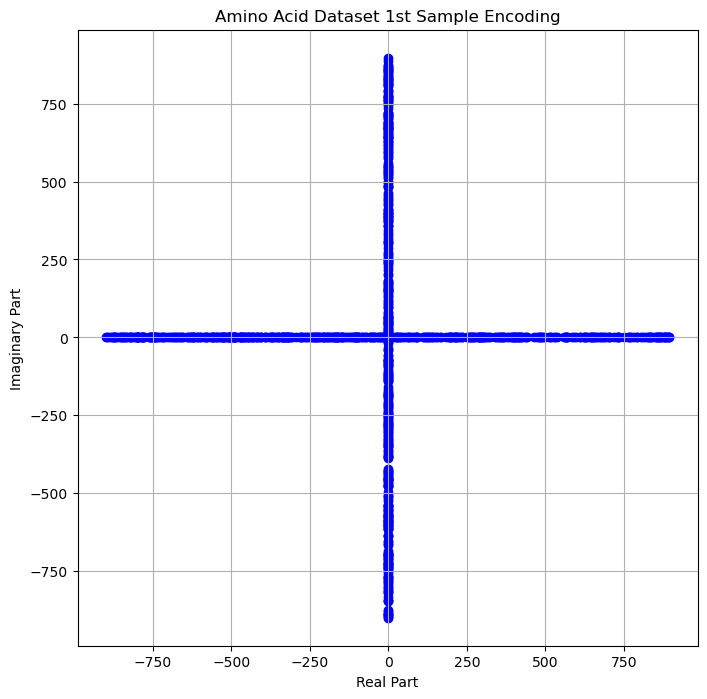

In [5]:
#Plot of the complex numbers of a coded DNA sequence on a plane
import matplotlib.pyplot as plt

# Complex numbers of a coded DNA sequence
complex_numbers = [1j, -2j, 3, 4j, 5j, -6, 7j, -8j, -9, 10j, -11, 12j, 13j, 14j, -15, -16j, 17, -18j, 19j, -20, -21, 22j, -23, 24j, 25, 26j, 27, 28, -29, -30, 31j, 32, -33, 34j, -35j, 36, 37, -38, -39j, 40j, -41j, 42j, 43j, 44, 45j, -46, -47, -48, 49j, 50j, 51, 52j, -53, -54, 55j, -56j, -57, 58j, -59, -60j, 61, 62j, 63, 64j, 65j, 66, 67j, -68j, 69, -70, -71j, -72, 73j, -74j, -75j, -76j, 77, -78, 79j, -80j, 81, 82j, -83, -84j, -85, -86j, 87, 88, -89j, 90, 91, -92j, -93, 94j, -95j, -96, 97j, -98, -99, 100j, -101, -102, -103, -104j, -105, 106j, -107, -108, 109j, -110, 111, -112j, -113j, 114, -115, -116j, 117, 118j, 119j, -120, -121j, -122j, 123, 124, -125, -126j, 127, -128j, 129, 130j, -131j, -132, 133j, -134j, 135, 136, -137, -138j, 139j, -140j, -141j, 142, 143, -144, 145j, -146, -147, 148j, -149, -150, 151j, 152j, 153, 154j, 155j, 156, -157, -158j, -159, -160, 161j, -162, -163, 164j, 165, -166, -167, -168j, 169, -170, -171, 172j, 173j, -174, -175j, 176j, -177, -178, -179j, 180j, 181j, -182j, -183, -184j, 185, -186j, -187j, -188, -189j, -190, -191j, 192, 193, -194, -195, 196, -197j, 198, 199j, -200, 201, 202, 203j, -204, -205, -206j, -207, -208, -209j, 210, 211, -212j, 213, 214, -215, 216j, 217, -218j, 219, -220, -221j, -222, 223, -224j, -225, 226j, -227j, 228, -229, -230, -231, -232, -233j, 234, 235j, 236, -237, 238j, -239j, -240, 241j, -242j, -243, -244j, 245j, -246, 247j, -248j, -249j, 250, -251j, -252, 253j, -254j, 255, 256, 257j, -258j, -259, 260, -261, -262j, 263, 264, 265j, 266j, 267, -268, -269j, -270j, 271, 272, 273, -274j, 275j, -276, -277j, -278j, -279, -280, -281j, -282, -283j, 284, -285j, 286, 287j, 288, 289, -290j, 291, -292j, 293, 294, -295, -296j, 297, 298j, 299, -300j, 301, -302j, 303, 304, 305j, -306, 307j, -308j, 309, 310j, -311, -312, -313j, 314, -315, -316j, 317, -318, 319j, -320, -321, -322j, 323, -324, -325j, -326, -327, 328j, -329j, -330, -331, -332j, -333, -334, 335j, -336, -337, -338j, -339, -340j, 341, -342j, 343, -344j, -345, 346j, -347j, -348j, 349, -350, -351, -352, -353j, 354, 355, 356j, -357, 358j, 359, 360, -361j, 362j, -363, -364j, 365, 366, 367, -368, -369, 370j, -371j, -372, 373j, -374, -375, 376j, 377j, -378j, 379, -380, -381j, 382j, -383j, -384j, 385, 386j, 387j, -388j, 389j, -390, 391, -392, -393, 394j, 395, 396, 397j, 398j, 399, 400j, 401, 402, 403j, -404, 405, 406, -407, -408, 409j, 410j, 411, 412j, 413, 414, 415, -416, -417, 418, -419, 420, -421, -422j, 423, 424j, -425j, 426, 427j, -428j, -429, -430, -431j, -432j, 433j, -434, -435, 436, -437j, -438, -439j, 440, 441, 442j, -443, -444, 445j, -446j, -447, -448j, -449, -450, 451j, -452j, -453j, -454j, -455j, -456, 457j, -458j, -459, -460j, -461, -462, 463j, -464j, 465, -466, -467, -468, -469, -470, -471j, -472, -473j, 474, -475j, -476j, -477, -478j, 479, 480, 481j, 482, 483j, 484j, 485, -486, -487, 488j, -489, -490, 491, -492, -493, 494, -495, -496, -497j, 498j, 499j, 500, -501, -502, -503, -504j, -505, -506, -507, -508, -509, -510j, 511j, 512, -513j, -514, 515j, 516, -517j, 518, -519, 520j, -521, -522, 523j, -524j, -525, -526, 527j, 528, -529, 530j, -531, 532, 533j, -534, -535, 536j, -537j, 538, -539j, -540j, 541j, -542j, -543, -544j, 545j, -546, 547j, -548, -549, 550j, -551j, -552j, -553j, 554j, -555, -556j, -557, -558, 559j, -560, 561, -562, -563j, 564, 565, 566, -567j, 568, -569, 570, -571j, -572j, -573j, -574j, 575j, -576j, 577j, -578j, -579, -580, -581, -582, -583j, -584j, 585, 586j, -587, -588j, -589j, -590j, 591, 592j, -593j, 594j, -595, -596j, 597, 598j, -599j, -600j, -601, -602j, -603, -604j, 605j, -606j, -607j, 608j, -609, -610, 611, 612, 613j, -614j, -615j, -616j, 617j, -618, -619, 620j, -621, 622, -623, 624, 625, -626, -627, 628j, 629j, 630, 631j, 632, -633, -634, -635j, -636j, -637j, 638j, -639, -640, 641j, 642, 643j, 644j, 645j, 646j, 647, 648, 649, 650, 651j, -652j, -653, 654j, 655j, 656, -657j, -658, 659, 660, -661, 662j, -663, -664j, -665j, 666j, 667j, 668, -669, 670j, 671j, -672, 673j, 674, 675j, 676j, 677, -678, 679j, -680, 681j, 682, 683j, -684j, 685j, 686, -687, -688, 689j, 690, 691j, 692j, -693j, -694j, -695, -696j, -697j, -698j, -699j, 700, -701, 702j, 703j, 704, -705j, -706j, 707, -708j, 709j, 710j, 711j, -712, -713j, -714j, 715j, -716, 717j, -718, 719j, 720, 721j, -722, -723j, -724j, -725j, -726, -727j, 728, -729j, 730, -731j, 732, -733j, -734, -735j, 736, 737j, -738, -739j, -740j, -741, -742j, -743, -744, 745j, -746, -747, -748j, -749, 750j, 751, 752j, -753, -754, -755, -756j, 757j, -758, -759, 760j, -761, 762j, 763, 764j, 765, -766j, -767j, -768j, 769, 770j, 771j, 772j, 773j, 774, -775j, -776j, -777, -778, 779j, -780j, 781, -782, -783, -784j, -785, -786, 787j, -788j, -789, 790j, 791, 792, 793j, -794j, -795, -796, -797, -798, -799, -800, -801, -802j, -803j, -804, 805, 806j, -807, 808j, 809j, -810j, 811, 812j, -813j, -814, -815j, 816j, 817, 818j, -819j, -820, 821j, -822, -823, -824, 825j, 826, 827, 828j, 829, 830j, 831j, -832, 833, -834j, -835, 836j, 837, -838, 839j, 840, 841j, -842j, -843, -844j, -845, -846j, 847j, 848, -849, 850j, -851, -852, 853j, 854, 855, 856, 857j, 858j, -859, 860, 861, 862j, 863j, 864, 865, -866, 867j, 868, -869, 870j, -871, 872, -873, 874j, -875j, -876, -877, -878j, 879, 880, 881, 882, -883, -884j, 885, 886j, -887j, -888j, -889, -890j, 891, 892, 893, -894j, 895, -896, 897j, -898j, -899j, -900]


real_parts = [z.real for z in complex_numbers]
imaginary_parts = [z.imag for z in complex_numbers]

# plot
plt.figure(figsize=(8, 8))
plt.scatter(real_parts, imaginary_parts, color='blue')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Amino Acid Dataset 1st Sample Encoding')
plt.grid(True)
plt.show()



STEP 4: CLASSIFICATION OF DNA SEQUENCES USING COMPLEX VALUE DEEP LEARNINGNGDN


Description: Although building and training neural networks from scratch can be lengthy and difficult, the embedded modules of the Keras and Tensorflow libraries, which run in the background and are preloaded in Python, make the task easier as they can perform basic operations such as backpropagation. Since complex-valued neural networks are still an active research topic, there is still a need to define specialised classes for model development. In this study, a special "ComplexDense" class that can perform complex operations is defined using Tensorflow and Keras libraries. The complex hyperbolic tangent (ctanh) activation function is used in the model. The complex network model consists of 5 layers: 1 input layer, 3 hidden layers and 1 output layer. Euclidean norm is used as the error function and Wirtinger derivative is used in back propagation. For binary classification and labelling, the Adam optimisation algorithm performed adequately. The learning rate was set to 0.005 and the model was trained for 80 epochs. How to define a loss function or its derivative that accurately reflects the nature of complex numbers is still an active research topic in the literature, and there are different views and approaches depending on the problem type. Since the Wirtinger-based error function we use performs adequately in the learning process of the model, the approach is acceptable.

In [23]:
# protein classification using DNA dataset with complex deep learning (Complex-Valued Artificial Neural Networks)

import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
# Custom activation functions
def complex_tanh(z):
    return tf.complex(tf.math.tanh(tf.math.real(z)), tf.math.tanh(tf.math.imag(z)))

class ComplexDense(Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(ComplexDense, self).__init__(**kwargs)
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units, 2),
                                      initializer='random_normal',
                                      trainable=True)
        self.bias = self.add_weight(shape=(self.units, 2),
                                    initializer='zeros',
                                    trainable=True)

    def call(self, inputs):
        inputs_real, inputs_imag = tf.math.real(inputs), tf.math.imag(inputs)
        kernel_real, kernel_imag = self.kernel[..., 0], self.kernel[..., 1]
        bias_real, bias_imag = self.bias[..., 0], self.bias[..., 1]

        output_real = tf.matmul(inputs_real, kernel_real) - tf.matmul(inputs_imag, kernel_imag) + bias_real
        output_imag = tf.matmul(inputs_real, kernel_imag) + tf.matmul(inputs_imag, kernel_real) + bias_imag

        output = tf.complex(output_real, output_imag)

        if self.activation is not None:
            output = self.activation(output)

        return output

def wirtinger_derivative(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz = tf.math.conj(y_pred - y_true) 
    dF_dz_star = (y_pred - y_true)
    return dF_dz, dF_dz_star

def wirtinger_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.complex64)
    y_pred = tf.cast(y_pred, tf.complex64)
    dF_dz, dF_dz_star = wirtinger_derivative(y_true, y_pred)
    return tf.math.abs(dF_dz)**2 + tf.math.abs(dF_dz_star)**2

# Load the data
data = pd.read_excel("D:\datasetTEZ\KİNASE_GPCR_DNA_Complex_Encoded.xlsx")

X = np.array([np.array(list(map(float, x_real.strip("[]").split(',')))) + 1j * np.array(list(map(float, x_imag.strip("[]").split(',')))) for x_real, x_imag in zip(data['Real'], data['Imag'])])
y = data['label'].values

# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Model definition
input_layer = Input(shape=(X_train.shape[1],), dtype=tf.complex64)

complex_dense1 = ComplexDense(12, activation=complex_tanh)(input_layer)
complex_dense2 = ComplexDense(8, activation=complex_tanh)(complex_dense1)
complex_dense3 = ComplexDense(6,activation=complex_tanh)(complex_dense2)

output_layer = ComplexDense(2, activation=complex_tanh)(complex_dense3)

model = Model(inputs=input_layer, outputs=output_layer)

# Define a loss function for complex numbers
def complex_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# Compile the model with the new metric

model.compile(optimizer=Adam(learning_rate=0.005), loss=wirtinger_loss, metrics=[complex_error, 'accuracy'])

# Fit the model and evaluate as before
history = model.fit(X_train, y_train, epochs=80, batch_size=10, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create a confusion matrix
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print('Confusion Matrix:\n', cm)
print('Accuracy: ', accuracy)
print('F1 Score: ', f1)


Epoch 1/80
16/16 [==============================] - 1s 14ms/step - loss: 0.8890 - complex_error: 0.4994 - accuracy: 0.6125 - val_loss: 0.7340 - val_complex_error: 0.4980 - val_accuracy: 0.6250
Epoch 2/80
16/16 [==============================] - 0s 3ms/step - loss: 0.5915 - complex_error: 0.4955 - accuracy: 0.6187 - val_loss: 0.5287 - val_complex_error: 0.4953 - val_accuracy: 0.6500
Epoch 3/80
16/16 [==============================] - 0s 3ms/step - loss: 0.4886 - complex_error: 0.4862 - accuracy: 0.6875 - val_loss: 0.4723 - val_complex_error: 0.4772 - val_accuracy: 0.6750
Epoch 4/80
16/16 [==============================] - 0s 3ms/step - loss: 0.4281 - complex_error: 0.4426 - accuracy: 0.7563 - val_loss: 0.4179 - val_complex_error: 0.4046 - val_accuracy: 0.7750
Epoch 5/80
16/16 [==============================] - 0s 3ms/step - loss: 0.3738 - complex_error: 0.3672 - accuracy: 0.8250 - val_loss: 0.4131 - val_complex_error: 0.3724 - val_accuracy: 0.8500
Epoch 6/80
16/16 [=====================



STEP 5: RESULT and GRAPHS Classification results measured by different metrics are visualised with graphs.

Short Description: Kinase and GPCR proteins were encoded into complex numbers used DNA sequences and then classified by Complex Deep networks. Results were measured with Accuracy, Confusion matrix, Precision, Recall and F1 Score metrics. In general, the success values of the model are quite high and the prediction distributions are balanced between classes.

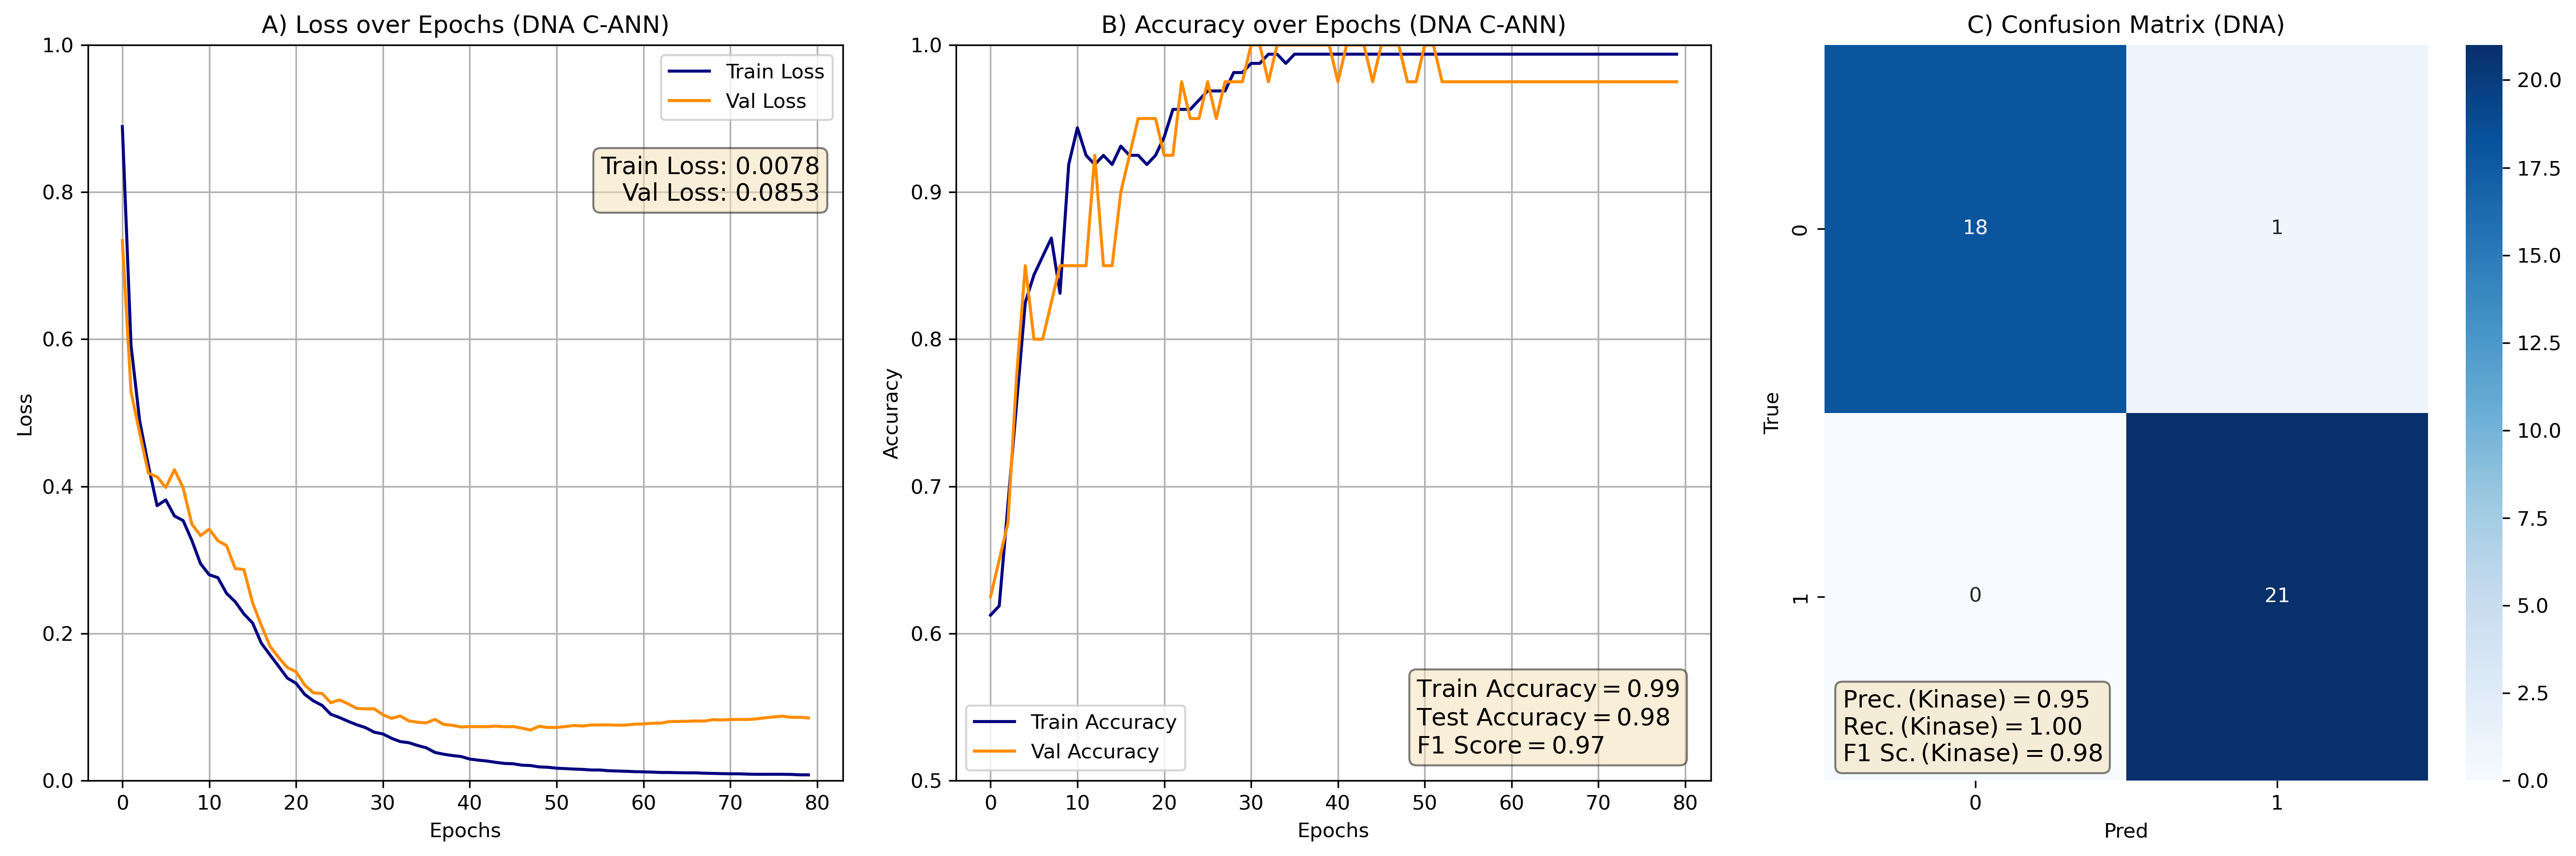

In [25]:
# Plots metric results and graphs & runs in conjunction with complex deep learning code (or it won't run)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# These codes are run together with Complex-valued deep learning codes and are defined by the model's Test results and training history
# suppose history.history['loss'], history.history['val_loss'], history.history['accuracy'] and history.history['val_accuracy'] are defined)

# Calculate metrics for class A (GPCR) (label 0) and class B (Kinase) (label 1)
precision_A = precision_score(y_test_classes, y_pred_classes, labels=[0], average='macro')
recall_A = recall_score(y_test_classes, y_pred_classes, labels=[0], average='macro')
f1_A = f1_score(y_test_classes, y_pred_classes, labels=[0], average='macro')

precision_B = precision_score(y_test_classes, y_pred_classes, labels=[1], average='macro')
recall_B = recall_score(y_test_classes, y_pred_classes, labels=[1], average='macro')
f1_B = f1_score(y_test_classes, y_pred_classes, labels=[1], average='macro')

# Prepare the text for the confusion matrix plot
textstr_A = '\n'.join((
    r'$\mathrm{Prec.(GPCR)}=%.2f$' % (precision_A,),
    r'$\mathrm{Rec.(GPCR)}=%.2f$' % (recall_A,),
    r'$\mathrm{F1\ Sc.(GPCR)}=%.2f$' % (f1_A,)))

textstr_B = '\n'.join((
    r'$\mathrm{Prec.(Kinase)}=%.2f$' % (precision_B,),
    r'$\mathrm{Rec. (Kinase)}=%.2f$' % (recall_B,),
    r'$\mathrm{F1\ Sc.(Kinase)}=%.2f$' % (f1_B,)))

# Get the last training and validation accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

# Create text string for the training accuracy, validation accuracy and F1 score
textstr = '\n'.join((
    r'$\mathrm{Train\ Accuracy}=%.2f$' % (train_accuracy,),
    r'$\mathrm{Test\ Accuracy}=%.2f$' % (val_accuracy,),
    r'$\mathrm{F1\ Score}=%.2f$' % (f1_score(y_test_classes, y_pred_classes, average='macro'))))

# Start figure and axis
fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# Plot loss
ax[0].plot(history.history['loss'], color='navy', label='Train Loss')
ax[0].plot(history.history['val_loss'], color='darkorange', label='Val Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)
ax[0].set_title('A) Loss over Epochs (DNA C-ANN)')
ax[0].set_ylim(0.0, 1.0)  # Kayıp grafiği için aralığı burada ayarlıyorsunuz

# Plot accuracy
ax[1].plot(history.history['accuracy'], color='navy', label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'], color='darkorange', label='Val Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)
ax[1].set_title('B) Accuracy over Epochs (DNA C-ANN)')
ax[1].set_ylim(0.5, 1.0)  # Doğruluk grafiği için aralığı burada ayarlıyorsunuz

# Place a text box in upper left in loss plot (first subplot)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[0].text(0.97, 0.85, f'Train Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}', transform=ax[0].transAxes, fontsize=12, horizontalalignment='right', verticalalignment='top', bbox=props)

# Place a text box in upper left in accuracy plot (second subplot)
ax[1].text(0.61, 0.14, textstr, transform=ax[1].transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", ax=ax[2], cmap='Blues')
ax[2].set_xlabel('Pred')
ax[2].set_ylabel('True')
ax[2].set_title('C) Confusion Matrix (DNA)')

#this part did not need to be calculated
# Place text box for class A metrics in the left of confusion matrix plot
#ax[2].text(0.03, 0.02, textstr_A, transform=ax[2].transAxes, fontsize=12,
           #verticalalignment='bottom', bbox=props) 

# Place text box for class B metrics in the right of confusion matrix plot
ax[2].text(0.03, 0.02, textstr_B, transform=ax[2].transAxes, fontsize=12,
           verticalalignment='bottom', bbox=props)

plt.tight_layout()
plt.savefig("high_quality_plots.png", dpi=600)
plt.show()

RESULT: It is seen that the model's loss values decreased steadily over the periods to 0.08 levels for the test and training data sets, while the accuracy rate increased steadily and reached approximately 0.98 for the test data. These observations show that the learning process of the model on the data set was successful and the generalization capacity of the model is high. In general, the training and testing graphs of the model are close to each other. Analyzing the confusion matrix for the test data shows that the predictions are balanced between GPCR and Kinase classes.

The results show that the proposed complex coding method is effective in preserving the biological meaning of DNA sequences of proteins and enables high accuracy classification.